In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


THE dataset is about an Insurance company that has provided Health Insurance to its customers.
The model is to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

In order to predict, whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Annual Premium, sourcing channel) etc.

In [2]:
#Dataset Reading
data=pd.read_csv("C:/Users/shafi/Downloads/vehicle_data.csv")

In [3]:
#Top Of Dataset
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [4]:
#shape Of DataSet
data.shape

(381109, 12)

In [5]:
data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [6]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
#Information about Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


# 2# Preprocessing

1.Missing value handling

In [8]:
#Checking Null Values
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

2.Outlier detection and handling

<AxesSubplot:>

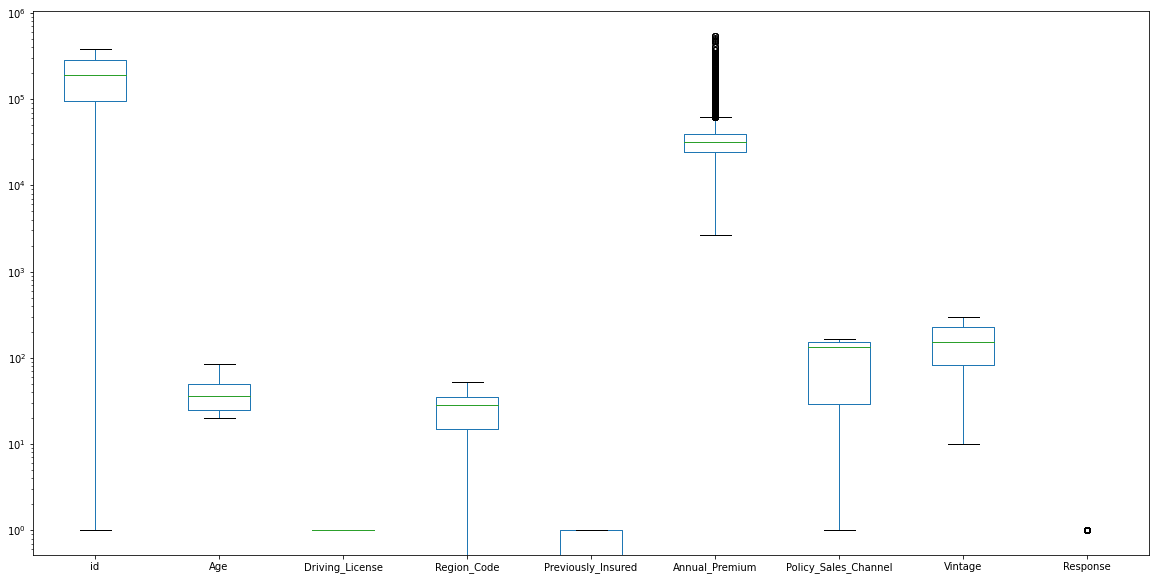

In [9]:
#Plotting BoxPlot Of All Continous Features
data.plot(kind='box', figsize=(20, 10), logy=True)

In [10]:
#Finding Quartile Values
Q1=np.percentile(data['Annual_Premium'],25,interpolation='midpoint')
Q2=np.percentile(data['Annual_Premium'],50,interpolation='midpoint')
Q3=np.percentile(data['Annual_Premium'],75,interpolation='midpoint')

print(Q1)
print(Q2)
print(Q3)

24405.0
31669.0
39400.0


In [11]:
#Inter Quartile Range
IQR=Q3-Q1

In [12]:
#Finding the Range Where the Annual Premium Values Lies
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

1912.5
61892.5


In [13]:
#Find the Actual Values of Annual Premium
data['Annual_Premium'][data['Annual_Premium']>up_limit] = up_limit
data['Annual_Premium'][data['Annual_Premium']<low_limit] = low_limit

<AxesSubplot:xlabel='Annual_Premium'>

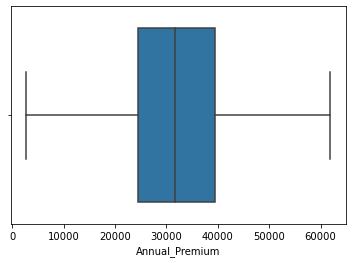

In [14]:
#Boxplot Without Outliers
sns.boxplot(data['Annual_Premium'],orient='h')

3.Encoding

In [15]:
#Creating Function To Retrieve Catogories From Catogorical Columns
def get_uniques(data, columns):
    return {column: list(data[column].unique()) for column in columns}

In [16]:
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [17]:
get_uniques(data, categorical_features)

{'Gender': ['Male', 'Female'],
 'Vehicle_Age': ['> 2 Years', '1-2 Year', '< 1 Year'],
 'Vehicle_Damage': ['Yes', 'No']}

In [18]:
#Binary Catogories
binary_features = ['Gender', 'Vehicle_Damage']

#Ordinal Catogory
ordinal_features = ['Vehicle_Age']

In [19]:
#Creating A Function For Binary Encoding
def binary_encode(data, column, positive_label):
    data = data.copy()
    data[column] = data[column].apply(lambda x: 1 if x == positive_label else 0)
    return data

In [20]:
data = binary_encode(data, 'Gender', 'Male')
data = binary_encode(data, 'Vehicle_Damage', 'Yes')

In [21]:
#Creating A function For Ordinal Encoding
def ordinal_encode(data, column, ordering):
    data = data.copy()
    data[column] = data[column].apply(lambda x: ordering.index(x))
    return data

In [22]:
age_ordering = ['< 1 Year', '1-2 Year', '> 2 Years']
data = ordinal_encode(data, 'Vehicle_Age', age_ordering)

In [23]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454.0,26,217,1
1,2,1,76,1,3,0,1,0,33536.0,26,183,0
2,3,1,47,1,28,0,2,1,38294.0,26,27,1
3,4,1,21,1,11,1,0,0,28619.0,152,203,0
4,5,0,29,1,41,1,0,0,27496.0,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,1,0,30170.0,26,88,0
381105,381106,1,30,1,37,1,0,0,40016.0,152,131,0
381106,381107,1,21,1,30,1,0,0,35118.0,160,161,0
381107,381108,0,68,1,14,0,2,1,44617.0,124,74,0


In [24]:
#Define Predictor Variable
X=data.drop(['id','Response'],axis=1)
#Define Target Variable
Y=data['Response']
 

In [25]:
#Splitting Train, Test Data Set
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42) 
X_train.shape,X_test.shape

((266776, 10), (114333, 10))

# Exploratory Data Analysis


### Histogram for various variables over counts.

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

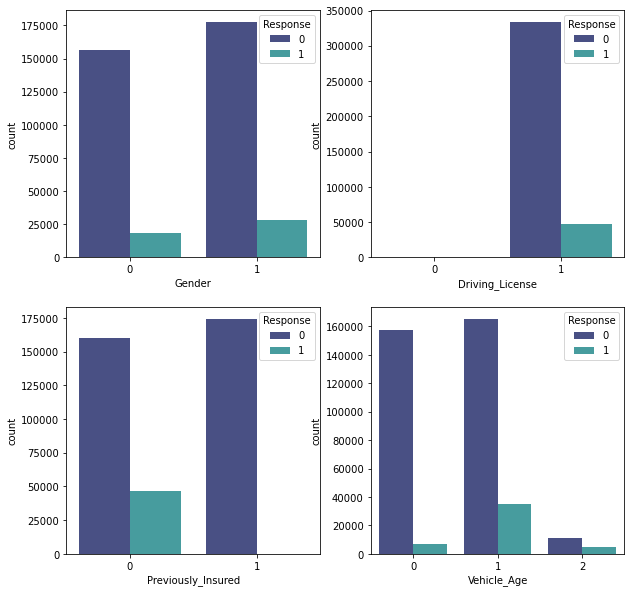

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=data,palette="mako") 
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=data,palette="mako") 
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=data,palette="mako") 
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=data,palette="mako")

**Interpretation**<br>
When speaking of response variable, 0 represents that the vehicle onwer are willing to buy the insurance for vehicle and so 1 for those who are not willing to buy a insurance.<br>
The count histogram for 'Gender' variable indicates that the more onwers of vehicles are male and also male onwers have more tendency to buy a insurance for thier vehicle.<br> 
The histogram for 'Driving_lisence' indicates that those who have license and almost 90% of them are willing to buy a insurance. and almost 50000 of onwers those who have license are not willing to buy insurance. And some of the onwers who doesn't have license are also willing buy a insurance.<br>
The histogram for 'Previously_Insured' indicates that the almost 75% of the onwers those who hasn't previously insurured are now willing to take new insurance polices and those who have previously insured  the vehicle are still going the same way.<br>
The histogram for 'Vehicle_age' deplicts that vehicle data more vehicles has age between 1 and 2 years and only less vehicle has age greater than 2. Asusally the most of all new vehicle onwers are villing to take a insurance when comparing to the others,eventually those who are willing to buy insurance in still slightly high for the 2nd group since this group has more no of onwers than any other groups.<br>


#### Nomal  plot fot Age variable.

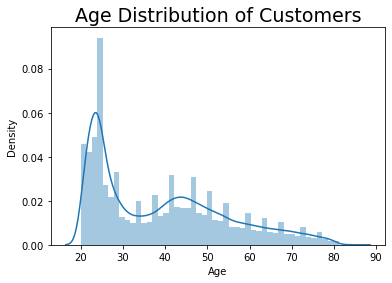

In [27]:
sns.distplot(data.Age)
plt.title('Age Distribution of Customers',fontsize=19)
plt.show()

**Conclusion**

Firstly the distribution is multimodal. And technically speaking this is a positively or right skewed data. Already we know that the mean of 'Age' is aproximately 38 and median of the 'Age' is 36 and while analysing the above plot that we can say the mode will lies inbetween the 23 and 30. So while comparing these value also (that is mode < median < mean) the data is positively skewed and most of all values is lies between 20 and 50, which mean most of all onwers age is between this 20 and 50.



#### Scatter plot between Age and Annual Premium

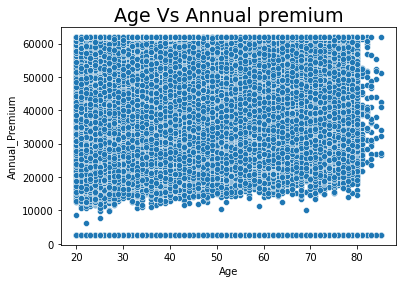

In [28]:
sns.scatterplot(x=data['Age'],y=data['Annual_Premium'])
plt.title('Age Vs Annual premium',fontsize=19)
plt.show()

**Conclusion**

We can conclude that the from those who have are between 20 to 80 equaly prefers for the insuranc which has annual premium value is less than 100000 and for those who prefer the insurance has premium value greater than 200000 will exponential decreasing from age 20 to 80 and more.



#### Categorical Plot for Gender v/s Driving License.

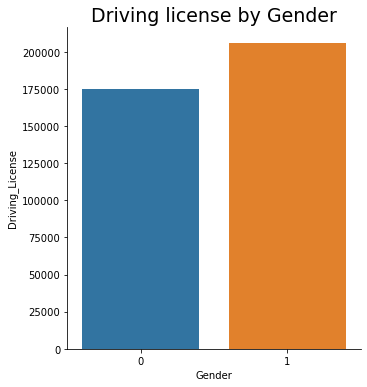

In [29]:
df=data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");
plt.title('Driving license by Gender',fontsize=19)
plt.show()

**Conclusion**

In Female Catogory Around 175000 People Have Driving Licence. And, More Than 2Lakh Males Have Driving Licence 


#### Plotting Histogram Of Each Column In The Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

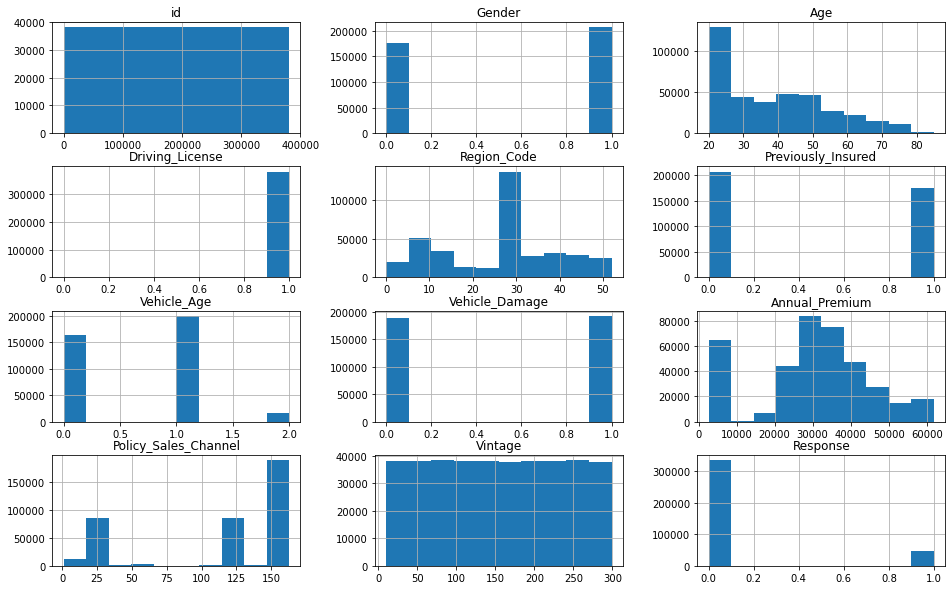

In [30]:
data.hist(figsize=(16,10))
plt.show

Since some of the variables are descibed deeply earlier and other histograms for id, vintage are completely meaning less if interpreting using the respective hist of those variables.



#### Plotting Count Plot Of Variable Vehicle Age With Respect to Responce

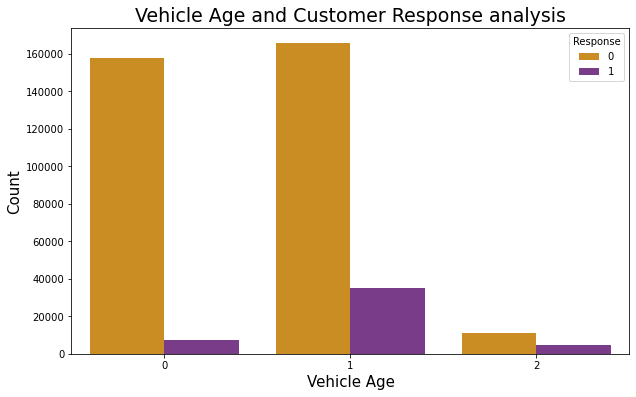

In [31]:
plt.figure(figsize = (10,6) )
sns.countplot(data =data, x = 'Vehicle_Age', hue = 'Response', palette='CMRmap_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

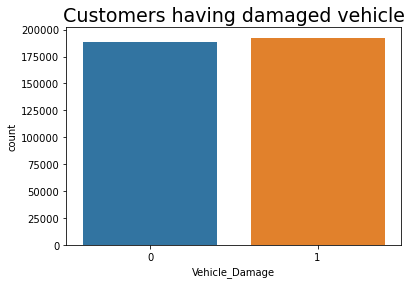

In [32]:
#Customer Having Damaged Vehicle
plt.title('Customers having damaged vehicle',fontsize=19)
sns.countplot(data.Vehicle_Damage)
plt.show()

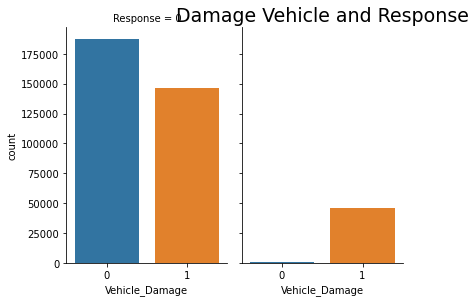

In [33]:
#Damage Vehicle and Response
df=data.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
sns.catplot(x="Vehicle_Damage", y="count",col="Response", data=df, kind="bar",height=4, aspect=.7);
plt.title('Damage Vehicle and Response', fontsize = 19)
plt.show()

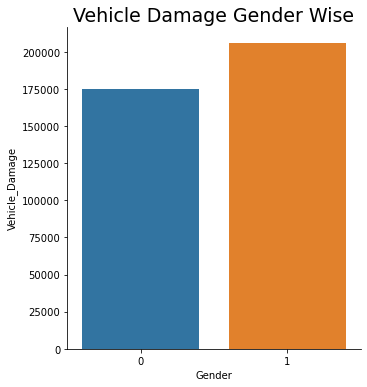

In [34]:
# Plot Of Vehicle Damage Gender Wise
df2=data.groupby(['Gender'])['Vehicle_Damage'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Vehicle_Damage",data=df2, kind="bar");
plt.title('Vehicle Damage Gender Wise', fontsize = 19)
plt.show()

**Conclusion**

Male Having Damaged Vehicle is More than Female's

#### Function For Percentage Value.

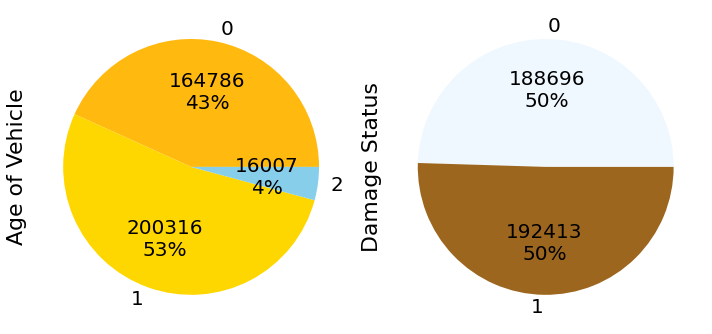

In [35]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

#Plotting Some Pie Charts about Age Of Vehicle , Damage Status
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

data.groupby('Vehicle_Age').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['#FFB90F', 'gold', 'skyblue'], ax=ax1)
data.groupby('Vehicle_Damage').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['#F0F8FF', '#9C661F'], ax=ax2)
ax1.set_ylabel('Age of Vehicle', size=22)
ax2.set_ylabel('Damage Status', size=22)
plt.tight_layout()
plt.show()

**Interpretation**
As we already mentioned that most of vehicles in this data has age between 1 and 2 years. So, now we can clearly validate the statement using the respective percentage that 53% of vehicles age in the data between 1 and 2 years and 43% of vehcles age in this data less than 1 year and only 4% of vehicles have age greater than 3.<br>

The second pie chart states that the vehicles has damaged and vehicles doesn't have any damages is almost equal. but in number vehicle with no damges are slighly high.


#### Plot A Graph About People who have Vehicle Insurance Already

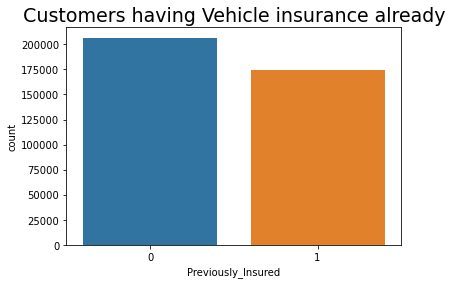

In [36]:
plt.title('Customers having Vehicle insurance already',fontsize=19)
sns.countplot(data.Previously_Insured)
plt.show()

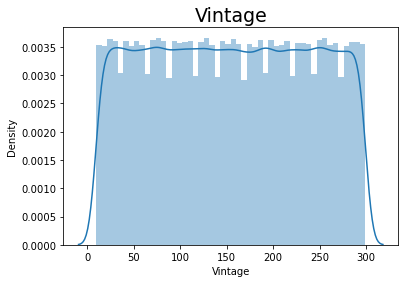

In [37]:
#Plot A Graph About Vintage
sns.distplot(data.Vintage)
plt.title('Vintage',fontsize=19)
plt.show()

# Data Modelling and Evaluation

In [38]:
#Import Neccessary Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [39]:
#LOGISTIC REGRESSION MODEL
logit_model=LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_pred = logit_model.predict(X_test)

In [40]:
print('Accuracy is  :',accuracy_score(Y_test,Y_pred))
print('precision is  :',precision_score(Y_test,Y_pred))
print('Recall is  :',recall_score(Y_test,Y_pred))
print('f1 score :',f1_score(Y_test,Y_pred))

Accuracy is  : 0.8763436628095126
precision is  : 0.0
Recall is  : 0.0
f1 score : 0.0


In [41]:
#Performimg Min Max Scaling in Annual Premium
from sklearn import preprocessing

min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
data[['Annual_Premium']] = min_max.fit_transform(data[['Annual_Premium']])

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,0.638245,26,217,1
1,2,1,76,1,3,0,1,0,0.521510,26,183,0
2,3,1,47,1,28,0,2,1,0.601797,26,27,1
3,4,1,21,1,11,1,0,0,0.438540,152,203,0
4,5,0,29,1,41,1,0,0,0.419591,152,39,0


In [42]:
#Checing Again Logistic Regression
logit_model=LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_pred = logit_model.predict(X_test)

In [43]:
print('Accuracy is  :',accuracy_score(Y_test,Y_pred))
print('precision is  :',precision_score(Y_test,Y_pred))
print('Recall is  :',recall_score(Y_test,Y_pred))
print('f1 score :',f1_score(Y_test,Y_pred))

Accuracy is  : 0.8763436628095126
precision is  : 0.0
Recall is  : 0.0
f1 score : 0.0


No Value Change In Accuracy

In [44]:
confusion_matrix(Y_test,Y_pred)

array([[100195,      0],
       [ 14138,      0]], dtype=int64)

In [45]:
#RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)

In [46]:
print('Accuracy is  :',accuracy_score(Y_test,Y_pred))
print('precision is  :',precision_score(Y_test,Y_pred))
print('Recall is  :',recall_score(Y_test,Y_pred))
print('f1 score :',f1_score(Y_test,Y_pred))

Accuracy is  : 0.86608415767976
precision is  : 0.37174721189591076
Recall is  : 0.12024331588626397
f1 score : 0.18171129282240395


In [47]:
confusion_matrix(Y_test,Y_pred)

array([[97322,  2873],
       [12438,  1700]], dtype=int64)

Both models have almost same accuracy.

# model fine tuning

In [48]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [49]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')

In [50]:
rft.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [51]:
Y_pred=rft.predict(X_test)
f1_score(Y_test,Y_pred)

0.0